# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [2]:
%pylab inline
import pandas as pd
import math

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [3]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

In [5]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_348\2381588978.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


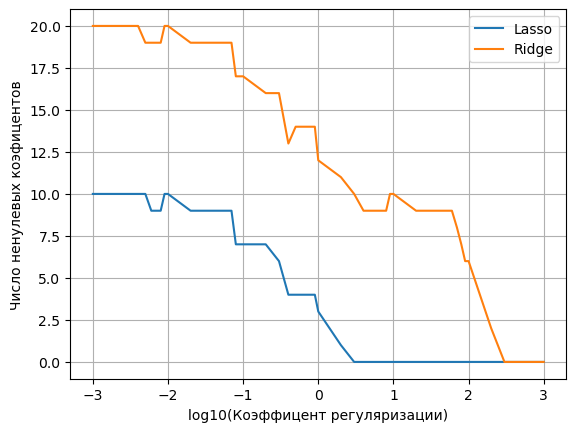

In [16]:
alphas = []
lasso_non_zero_coefs = []
ridge_non_zero_coefs = []
for j in range (-3, 3):
    for i in range (1,11):
        alpha = i * (10 ** j)
        alphas.append(math.log(alpha, 10))
        l1 = linear_model.Lasso(alpha=alpha).fit(X_train, y_train)
        l2 = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)
        p1 = l1.predict(X_test)
        p2 = l2.predict(X_test)
        cnt = 0
        for k in l1.coef_ :
            if (abs(k) > 3):
                cnt += 1
        lasso_non_zero_coefs.append(cnt)
        for k in l2.coef_ :
            if (abs(k) > 3):
                cnt += 1
        ridge_non_zero_coefs.append(cnt)

fig, ax = plt.subplots()

ax.plot(alphas, lasso_non_zero_coefs, label=u"Lasso")
ax.plot(alphas, ridge_non_zero_coefs, label=u"Ridge")
ax.set_xlabel(u"log10(Коэффицент регуляризации)")
ax.set_ylabel(u"Число ненулевых коэфицентов")
ax.grid()
ax.legend()

fig.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
model = linear_model.Ridge().fit(X_train, y_train)
p = model.predict(X_test)

print("mean_squared_error: ",mean_squared_error(y_test, p) ** 0.5)

print("mean_absolute_error: ", mean_absolute_error(y_test, p))

print("r2_score: ",r2_score(y_test, p))

mean_squared_error:  58.30429511391227
mean_absolute_error:  49.60275080965191
r2_score:  0.3599020220009461


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

C:\Users\User\AppData\Local\Temp\ipykernel_348\3801422414.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


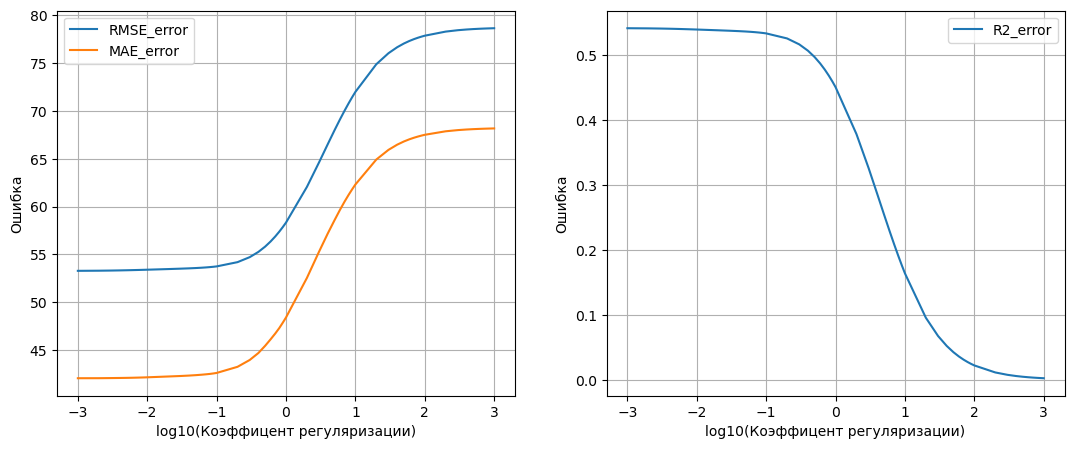

In [10]:
alphas = []
root_mean_squared_errors = []
mean_absolute_errors = []
r2_scores = []

for j in range (-3, 3):
    for i in range (1,11):
        alpha = i * (10 ** j)
        alphas.append(math.log(alpha, 10))
        l2 = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)
        p2 = l2.predict(X_train)
        root_mean_squared_errors.append(mean_squared_error(y_train, p2) ** 0.5)
        mean_absolute_errors.append(mean_absolute_error(y_train, p2))
        r2_scores.append(r2_score(y_train, p2))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(alphas, root_mean_squared_errors, label=u"RMSE_error")
ax1.plot(alphas, mean_absolute_errors, label=u"MAE_error")
ax1.set_xlabel(u"log10(Коэффицент регуляризации)")
ax1.set_ylabel(u"Ошибка")
ax1.grid()
ax1.legend()

ax2.plot(alphas, r2_scores, label=u"R2_error")
ax2.set_xlabel(u"log10(Коэффицент регуляризации)")
ax2.set_ylabel(u"Ошибка")
ax2.grid()
ax2.legend()

f.show()

In [21]:
model = linear_model.Ridge(alpha=0.1).fit(X_train, y_train)
p = model.predict(X_test)

print("mean_squared_error: ",mean_squared_error(y_test, p) ** 0.5)

print("mean_absolute_error: ", mean_absolute_error(y_test, p))

print("r2_score: ",r2_score(y_test, p))

mean_squared_error:  55.64176122404912
mean_absolute_error:  47.3754637570613
r2_score:  0.41702880920983465


__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([65., 30., 14.,  6.,  6.,  6.,  2.,  2.,  1.,  1.]),
 array([3.34838909e+00, 1.79629293e+03, 3.58923747e+03, 5.38218201e+03,
        7.17512655e+03, 8.96807109e+03, 1.07610156e+04, 1.25539602e+04,
        1.43469047e+04, 1.61398492e+04, 1.79327938e+04]),
 <BarContainer object of 10 artists>)

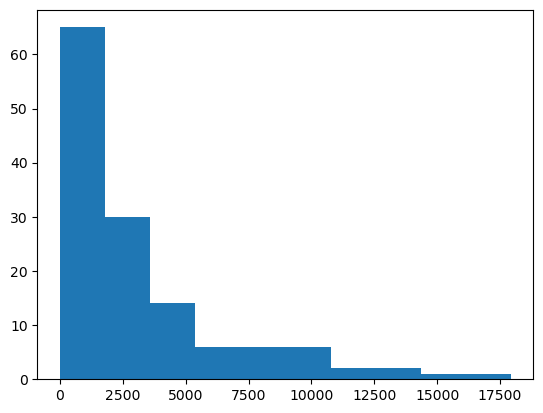

In [22]:
errors = []
for i in range(len(X_test)):
    errors.append(mean_squared_error([y_test[i]], [p[i]]))
plt.hist(errors)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [28]:
X_train_new = []
y_train_new = []
p = model.predict(X_train)
for i in range(len(X_train)):
    if(mean_squared_error([y_train[i]], [(p[i])]) < 10000):
        X_train_new.append(X_train[i])
        y_train_new.append(y_train[i])
model = linear_model.Ridge(alpha=0.01).fit(X_train_new, y_train_new)
p = model.predict(X_test)

print("mean_squared_error: ",mean_squared_error(y_test, p) ** 0.5)

print("mean_absolute_error: ", mean_absolute_error(y_test, p))

print("r2_score: ",r2_score(y_test, p))

mean_squared_error:  56.57043860744155
mean_absolute_error:  46.54198374128106
r2_score:  0.3974064915350327


__Задание 3.__ Отчёт

**(2 балла)**

Было нормально, быстро рассказали что к чему, понаходил ошибки, и собственно всё
# Хелпа Артёма Багринцева)
